Sample Data __> y_true = (0.75* X_data)+ 5 + noise

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
x_data = np.linspace(0.0, 10.0,1000000)

In [15]:
nosie = np.random.randn(len(x_data))

In [16]:
y_true = (0.75 * x_data)+ 5 + nosie

In [17]:
my_data =pd.concat([pd.DataFrame(x_data, columns=['X']), pd.DataFrame(y_true, columns=['Y'])], axis=1)

<Axes: xlabel='X', ylabel='Y'>

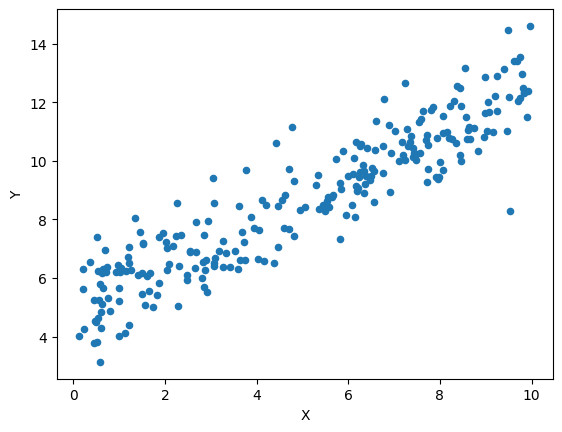

In [18]:
my_data.sample(n=250).plot(kind='scatter', x='X', y='Y')

In [19]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [29]:
# This cell's content will be moved to cab5zY7b7BpI for consolidation.

In [30]:
# This cell's content will be moved to cab5zY7b7BpI for consolidation.

In [22]:
intit = tf.global_variables_initializer()

In [23]:
# แก้บรรทัดนี้จาก init เป็น config
config = tf.compat.v1.ConfigProto()

config.log_device_placement = True
config.gpu_options.allow_growth = True
config.gpu_options.per_process_gpu_memory_fraction = 0.6

In [32]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() # สำคัญ: เปิดโหมดให้รองรับโค้ดเก่า

tf.reset_default_graph() # Ensure a clean graph before defining anything

with tf.device('/gpu:0'): # All graph operations will be within this device context
    # Define model variables
    m = tf.Variable(tf.ones([1],tf.float32))
    b = tf.Variable(tf.ones([1],tf.float32))

    # Define placeholders for inputs
    xph = tf.placeholder(tf.float32,[None])
    yph = tf.placeholder(tf.float32,[None])

    # Define the model's prediction
    y = m * xph + b

    # Define the error (loss function)
    error = tf.reduce_mean(tf.square(y-yph)) # Changed from reduce_sum to reduce_mean

    # Define the optimizer and training step
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.000001)
    train = optimizer.minimize(error)

    # Initialize all variables
    init_op = tf.global_variables_initializer()

    # --- ส่วนที่ 1: ประกาศตัวแปร my_config ---
    my_config = tf.ConfigProto()
    my_config.log_device_placement = True
    my_config.gpu_options.allow_growth = True
    my_config.gpu_options.per_process_gpu_memory_fraction = 0.6

    # --- ส่วนที่ 3: เริ่มการเทรน (Session) ---
    with tf.Session(config=my_config) as sess:

        # สั่งให้ตัวแปรทุกตัวเริ่มต้นทำงาน
        sess.run(init_op)

        epochs = 1000
        for i in range(epochs):
            feed = {xph: x_data, yph: y_true}
            sess.run(train, feed_dict=feed)

        # ดึงค่า m และ b ออกมาดูผลลัพธ์
        model_m, model_b = sess.run([m, b])
        print("Slope (m):", model_m)
        print("Intercept (b):", model_b)

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5

Slope (m): [1.0225375]
Intercept (b): [1.0053796]


In [33]:
model_b

array([1.0053796], dtype=float32)

In [34]:
model_m

array([1.0225375], dtype=float32)

### 1. ติดตั้ง `gh` CLI (GitHub CLI) และเชื่อมต่อกับบัญชี GitHub ของคุณ

ขั้นแรก คุณต้องติดตั้ง `gh` CLI ซึ่งเป็นเครื่องมือบรรทัดคำสั่งของ GitHub จากนั้นคุณจะต้องรับรองความถูกต้องด้วยบัญชี GitHub ของคุณเพื่ออนุญาตให้ Colab โต้ตอบกับ repositories ของคุณได้

In [ ]:
# ติดตั้ง gh CLI
!apt-get install gh -y

# รับรองความถูกต้องด้วย GitHub
# คุณจะต้องไปที่ URL ที่แสดงและป้อนรหัสที่คุณเห็นใน output นี้
!gh auth login

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
gh is already the newest version (2.83.1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.
78? Where do you use GitHub?  [Use arrows to move, type to filter]
> GitHub.com
  Other
7

### 2. โคลน (Clone) Repository ของคุณ

หลังจากที่คุณรับรองความถูกต้องแล้ว คุณสามารถโคลน repository ที่คุณต้องการบันทึกโน้ตบุ๊กไปไว้ได้ หากยังไม่มี คุณจะต้องสร้าง repository ใหม่บน GitHub ก่อน

**แทนที่ `your_username` และ `your_repository` ด้วยชื่อผู้ใช้ GitHub และชื่อ repository ของคุณ**

In [36]:
# โคลน repository
!git clone https://github.com/your_username/your_repository.git

# เปลี่ยนไปยัง directory ของ repository ที่โคลนมา
%cd your_repository

Cloning into 'your_repository'...
fatal: could not read Username for 'https://github.com': No such device or address
[Errno 2] No such file or directory: 'your_repository'
/content


### 3. เพิ่มไฟล์โน้ตบุ๊กของคุณไปยัง Repository

ตอนนี้คุณอยู่ใน directory ของ repository แล้ว คุณสามารถย้าย (หรือบันทึก) ไฟล์ `.ipynb` ของ Colab ไปที่นี่ได้

หากคุณต้องการบันทึกโน้ตบุ๊กปัจจุบัน คุณสามารถไปที่ `File > Save a copy to GitHub` ในเมนูของ Colab ได้โดยตรง ซึ่งจะง่ายกว่าการทำด้วยมือ

### 4. คอมมิต (Commit) การเปลี่ยนแปลง

เมื่อไฟล์โน้ตบุ๊กของคุณอยู่ใน directory ของ repository แล้ว คุณสามารถเพิ่มและคอมมิตการเปลี่ยนแปลงได้

In [37]:
# กำหนดค่าผู้ใช้ git (ทำเพียงครั้งเดียว)
!git config user.email "your_email@example.com"
!git config user.name "Your Name"

# เพิ่มไฟล์ทั้งหมดใน staging area
!git add .

# คอมมิตการเปลี่ยนแปลง
!git commit -m "Add Colab notebook"

fatal: not in a git directory
fatal: not in a git directory
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git


### 5. พุช (Push) การเปลี่ยนแปลงไปยัง GitHub

สุดท้าย คุณสามารถพุชการคอมมิตไปยัง repository บน GitHub ของคุณได้

In [38]:
# พุชการเปลี่ยนแปลง
!git push origin main # หรือชื่อ branch อื่นๆ เช่น master หาก repository ของคุณใช้ master

fatal: not a git repository (or any of the parent directories): .git
